<a href="https://colab.research.google.com/github/RanaAhmadNasse/HospitalAi/blob/master/Copy_of_anemia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#Import basic libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#Read in the data into a pandas dataframe.
data = pd.read_csv('anemia.csv')
data

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
...,...,...,...,...,...,...
1416,0,10.6,25.4,28.2,82.9,1
1417,1,12.1,28.3,30.4,86.9,1
1418,1,13.1,17.7,28.1,80.7,1
1419,0,14.3,16.2,29.5,95.2,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [4]:
#Explor Data
#Check basic metadata.
print('anemia ')
print(data.shape)
print('anemia general information')
print(data.info())
print('Are there any variables with missing data in Data?')
print(data.isnull().any().any())
print('How balanced are the anemia, i.e. how common are 0 ..?')
print(data['Hemoglobin'].value_counts())
print('number of precentage for each class')
print(data['Hemoglobin'].value_counts(normalize=True))
print('Hemoglobin: This is the target variable with values of 0 (low cost), 1 (medium cost), 2 (high cost), and 3 (very high cost)..')

anemia 
(1421, 6)
anemia general information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB
None
Are there any variables with missing data in Data?
False
How balanced are the anemia, i.e. how common are 0 ..?
Hemoglobin
11.5    39
13.4    37
11.1    37
13.2    36
13.1    36
        ..
9.1      1
7.8      1
8.6      1
7.5      1
9.9      1
Name: count, Length: 81, dtype: int64
number of precentage for each class
Hemoglobin
11.5    0.027445
13.4    0.026038
11.1    0.026038
13.2    0.025334
13.1    0.025334
          ...   
9.1     0.000704
7.8     0.000704


In [5]:
print(data.isnull().sum())
print('the prpblem in missing value is solve')

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64
the prpblem in missing value is solve


Text(0.5, 1.0, 'number of precentage for each type in Hemoglobin')

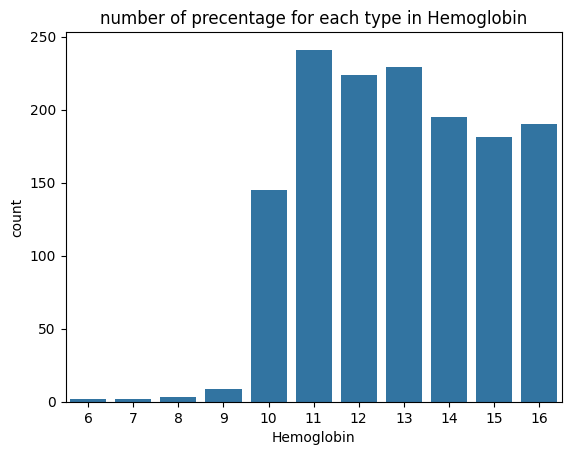

In [6]:
data['Hemoglobin'] = data['Hemoglobin'].values.astype(np.int64)
sns.countplot(x='Hemoglobin', data=data);
plt.title('number of precentage for each type in Hemoglobin')

Text(0.5, 1.0, 'Increasing the Hemoglobin level with the MCH')

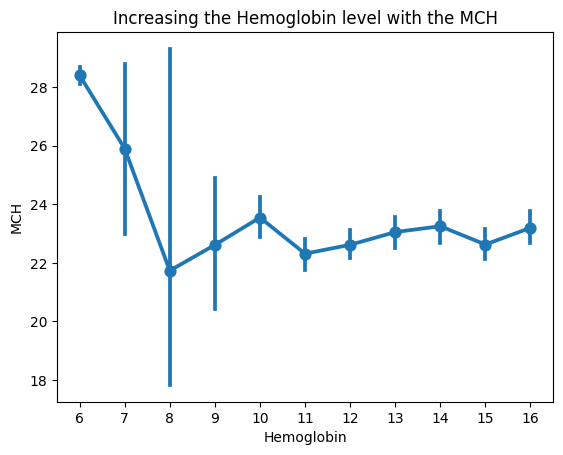

In [7]:
sns.pointplot(y='MCH',x='Hemoglobin',data=data)
plt.xlabel('Hemoglobin')
plt.ylabel('MCH')
plt.title('Increasing the Hemoglobin level with the MCH')

Text(0.5, 1.0, 'Increasing the Hemoglobin level with the MCV')

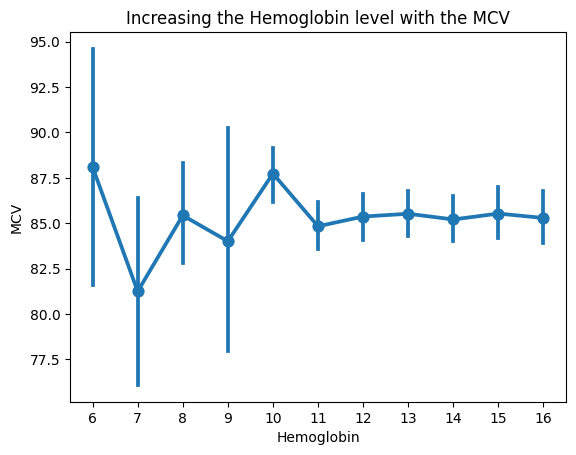

In [8]:
sns.pointplot(y='MCV',x='Hemoglobin',data=data)
plt.xlabel('Hemoglobin')
plt.ylabel('MCV')
plt.title('Increasing the Hemoglobin level with the MCV')

In [9]:
#Train/Test Split
# First split the data into features and response variable
X = data.drop(labels='Hemoglobin', axis=1)
y = data.loc[:,'Hemoglobin']
#We'll use a test size of 30%.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
print('The shape of training data')
print(X_train.shape)
print('The shape of testing data')
print(X_test.shape)

The shape of training data
(1136, 5)
The shape of testing data
(285, 5)


In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report #untuk confusion matrix
from sklearn.tree import DecisionTreeClassifier #untuk model decision tree
from sklearn import neighbors
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [11]:
# training a model KNN
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_predicted = classifier.predict(X_test)


In [12]:
# training a model DT
from sklearn.tree import DecisionTreeClassifier
ros_model =DecisionTreeClassifier()
ros_model.fit(X_train, y_train)
y_ros = ros_model.predict(X_test)
fold_acc_KNN = metrics.accuracy_score(y_test, y_ros)
print(" acc is:", fold_acc_KNN)

 acc is: 0.9052631578947369


In [13]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv("anemia_train.csv")
df_test = pd.read_csv("anemia_test.csv")

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          1421 non-null   int64  
 1   Gender      1421 non-null   int64  
 2   Hemoglobin  1421 non-null   float64
 3   MCH         1421 non-null   float64
 4   MCHC        1421 non-null   float64
 5   MCV         1421 non-null   float64
 6   Result      1421 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 77.8 KB


In [19]:
print ("There are {} rows in the train dataset and {} rows in the test dataset".format(
    df.shape[0],df_test.shape[0]))

There are 1421 rows in the train dataset and 1421 rows in the test dataset


In [20]:
#X = df.drop(['Hemoglobin'],1)
#y = df['Hemoglobin']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [ ]:
score = f1_score(y_test,y_pred, average = 'weighted')
model = 'KNightborsClassifier'
print ("The f1score for {} is {:.2f}".format(model,score))

The f1score for KNightborsClassifier is 0.33


In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred2 = tree.predict(X_test)

In [ ]:
score = f1_score(y_test,y_pred2, average = 'weighted')
model = 'DecisionTreeClassifier'
print ("The f1score for {} is {:.2f}".format(model,score))

The f1score for DecisionTreeClassifier is 0.87


In [ ]:
ensemble = RandomForestClassifier()
ensemble.fit(X_train,y_train)
y_pred3 = ensemble.predict(X_test)

In [ ]:
score = f1_score(y_test,y_pred3, average = 'weighted')
model = 'RandomForestClassifier'
print ("The f1score for {} is {:.2f}".format(model,score))

The f1score for RandomForestClassifier is 0.87


In [ ]:
#X_test = df_test.drop(['id'],1)
anemia1_test = knn.predict(X_test)

In [ ]:
#prediction = pd.DataFrame(anemia1_test,index=df_test.Id, columns = ['Hemoglobin'])
#prediction.to_csv("anemia1_test.csv")

In [ ]:
pickle.dump(knn, open('model.pkl', 'wb'))

In [ ]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
!streamlit run "/content/prediction.py" & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.139.116.28:8501

your url is: https://shiny-tigers-show.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea